# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data

## https://www.kaggle.com/competitions/widsdatathon2022/overview

# ركزت المسابقة على تحليل كفاءة الطاقة في المباني، حيث طُلب من المشاركين إنشاء نماذج لتوقع استهلاك الطاقة في المباني باستخدام مجموعة بيانات تتضمن متغيرات تصف خصائص المباني، والمتغيرات المناخية، ومتغيرات الطقس للمناطق التي تقع فيها المباني.




In [ ]:
#loading Data
df=pd.read_csv('WiDS Dataton.csv')

In [ ]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,december_min_temp,days_below_10F,days_below_0F,days_above_80F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,36,0,0,14,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,36,0,0,14,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,36,0,0,14,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,36,0,0,14,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,36,0,0,14,1.0,1.0,1.0,NaN,3.899395,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31107 entries, 0 to 31106
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                31107 non-null  int64  
 1   State_Factor               31107 non-null  object 
 2   building_class             31107 non-null  object 
 3   facility_type              31107 non-null  object 
 4   floor_area                 31107 non-null  float64
 5   year_built                 29614 non-null  float64
 6   energy_star_rating         14502 non-null  float64
 7   ELEVATION                  31107 non-null  float64
 8   january_min_temp           31107 non-null  int64  
 9   january_avg_temp           31107 non-null  float64
 10  january_max_temp           31107 non-null  int64  
 11  february_min_temp          31107 non-null  int64  
 12  february_avg_temp          31107 non-null  float64
 13  february_max_temp          31107 non-null  int

In [ ]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'november_max_temp', 'december_min_temp', 'days_below_10F',
       'days_below_0F', 'days_above_80F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog',
       'site_eui', 'id'],
      dtype='object')

In [ ]:
df.shape

(31107, 41)

# Remove column

In [ ]:
df.drop(['id'],axis=1,inplace=True)

# Remove Duplicated

In [ ]:
# Dropping the duplicate rows
print("Number of duplicate rows : ",df.duplicated().sum())

# df.drop_duplicates(inplace=True)

Number of duplicate rows :  26


# Data Cleaning
missing Value

In [ ]:
df.isnull().sum().sort_values(ascending = False).head(10)

direction_peak_wind_speed    19951
max_wind_speed               19915
direction_max_wind_speed     19915
days_with_fog                18486
energy_star_rating           16605
year_built                    1493
Year_Factor                      0
july_max_temp                    0
june_min_temp                    0
june_avg_temp                    0
dtype: int64

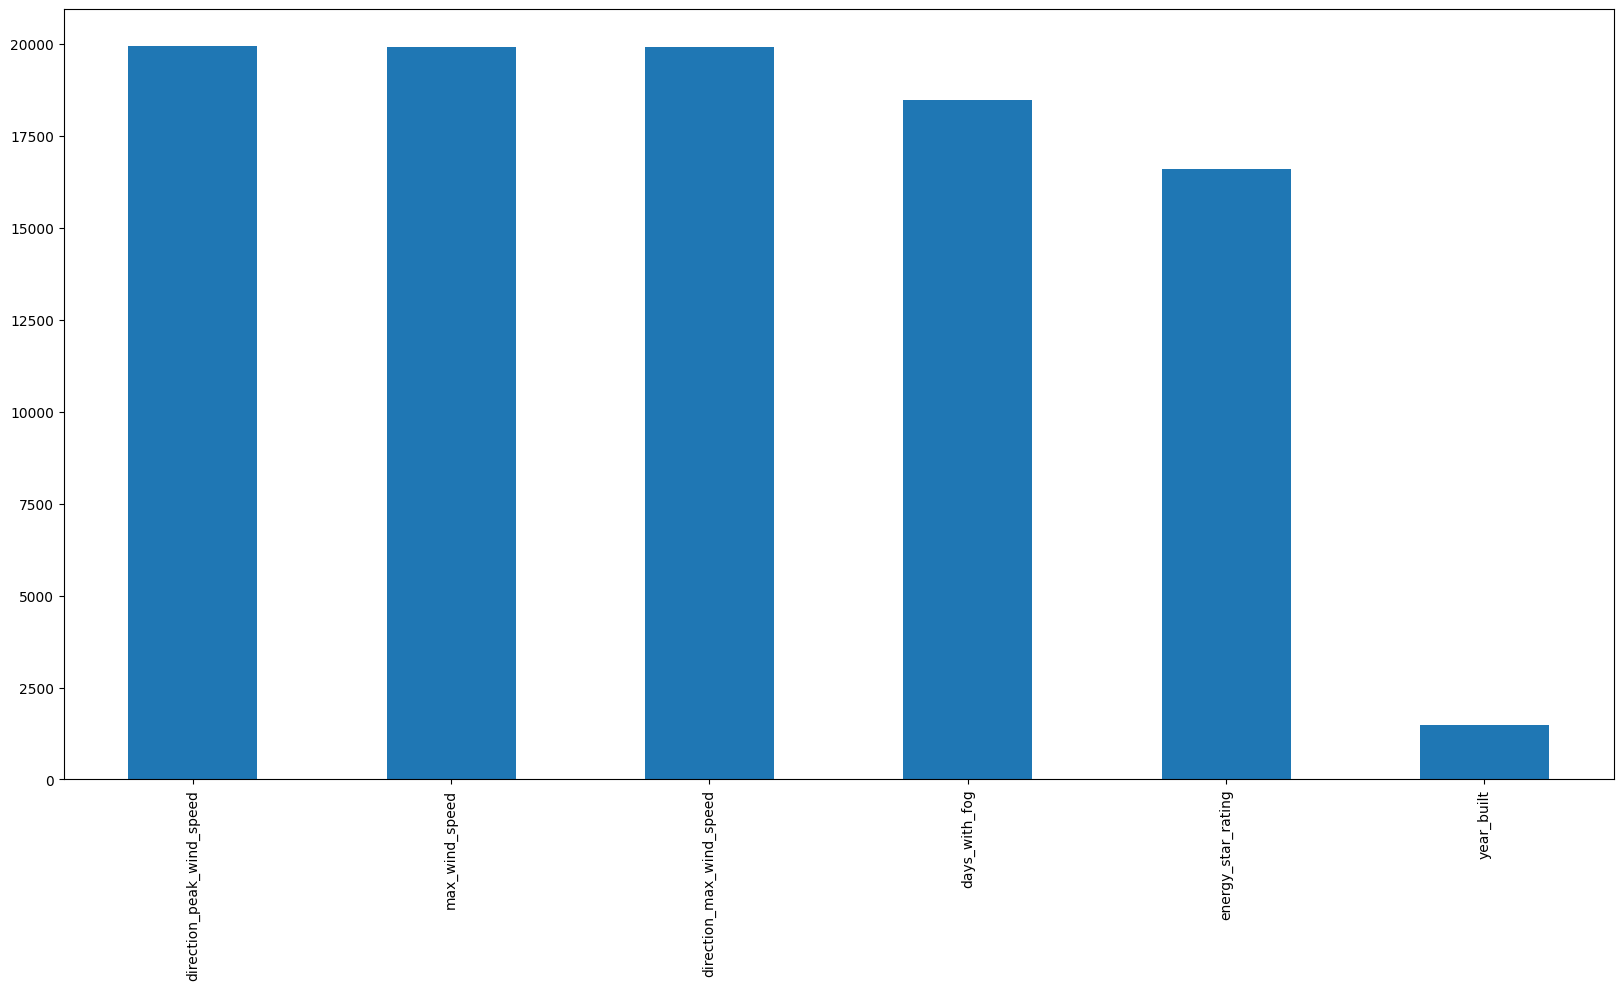

In [ ]:
plt.figure(figsize=(20,10))
df.isnull().sum().sort_values(ascending = False).head(6).plot(kind='bar')
plt.show()

In [ ]:
df.drop(['days_with_fog','direction_peak_wind_speed','energy_star_rating',
           'direction_max_wind_speed','max_wind_speed'],axis=1,inplace=True)

# Replace Nan value

In [ ]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='mean') #'median', 'mean', 'constant', 'most_frequent'

#df['year_built']=imputer.fit_transform(np.array(df['year_built']).reshape(-1, 1))
df['year_built']=pd.DataFrame(imputer.fit_transform(df[['year_built']]))


#df.fillna(int(df['year_built'].mean()),inplace=True)

In [ ]:
df['year_built'].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31107 entries, 0 to 31106
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Factor        31107 non-null  int64  
 1   State_Factor       31107 non-null  object 
 2   building_class     31107 non-null  object 
 3   facility_type      31107 non-null  object 
 4   floor_area         31107 non-null  float64
 5   year_built         31107 non-null  float64
 6   ELEVATION          31107 non-null  float64
 7   january_min_temp   31107 non-null  int64  
 8   january_avg_temp   31107 non-null  float64
 9   january_max_temp   31107 non-null  int64  
 10  february_min_temp  31107 non-null  int64  
 11  february_avg_temp  31107 non-null  float64
 12  february_max_temp  31107 non-null  int64  
 13  march_min_temp     31107 non-null  int64  
 14  march_avg_temp     31107 non-null  float64
 15  march_max_temp     31107 non-null  int64  
 16  april_min_temp     311

In [ ]:
df['facility_type'].head()

0                 Grocery_store_or_food_market
1    Warehouse_Distribution_or_Shipping_center
2                         Retail_Enclosed_mall
3                    Education_Other_classroom
4                    Warehouse_Nonrefrigerated
Name: facility_type, dtype: object

# Data Encoding

In [ ]:
for col in ['State_Factor','facility_type','building_class']:
    print(f'number of column {col} is : ',df[col].nunique())
    print(f'number of column {col} is : ',df[col].unique())

number of column State_Factor is :  4
number of column State_Factor is :  ['State_1' 'State_2' 'State_4' 'State_6']
number of column facility_type is :  58
number of column facility_type is :  ['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Religious_worship' 'Commercial_Unknown'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Public_Assembly_Social_meeting' 'Service_Uncategorized'
 'Warehouse_Refrigerated' 'Food_Service_Uncategorized'
 'Health_Care_Uncategorized' 'Food_S

## Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

lb=LabelEncoder()

for col in ['State_Factor','facility_type']:
    df[col] = lb.fit_transform(df[col])

In [ ]:
df['State_Factor'].unique()

array([0, 1, 2, 3])

## OneHotEconder

In [ ]:
onehotencoder=OneHotEncoder()

X=onehotencoder.fit_transform(np.array(df['building_class']).reshape(-1,1)).toarray()


In [ ]:
X

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
for i in range(X.shape[1]):
    df['N_'+str(len(df.columns))] = X[:,i]

df.drop(['building_class'],axis=1,inplace=True)


In [ ]:
df.head()

,Year_Factor,State_Factor,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,july_max_temp,august_min_temp,november_max_temp,december_min_temp,days_below_10F,days_below_0F,days_above_80F,site_eui,N_35,N_36
0,1,0,12,61242.0,1942.0,2.4,36,50.5,68,35,...,84,52,72,36,0,0,14,248.682615,1.0,0.0
1,1,0,54,274000.0,1955.0,1.8,36,50.5,68,35,...,84,52,72,36,0,0,14,26.500150,1.0,0.0
2,1,0,47,280025.0,1951.0,1.8,36,50.5,68,35,...,84,52,72,36,0,0,14,24.693619,1.0,0.0
3,1,0,5,55325.0,1980.0,1.8,36,50.5,68,35,...,84,52,72,36,0,0,14,48.406926,1.0,0.0
4,1,0,55,66000.0,1985.0,2.4,36,50.5,68,35,...,84,52,72,36,0,0,14,3.899395,1.0,0.0


In [ ]:
y=df['State_Factor']

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: State_Factor, dtype: int32

In [ ]:
X=df.drop(['State_Factor'],axis=1)

In [ ]:
X.head()

,Year_Factor,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,july_max_temp,august_min_temp,november_max_temp,december_min_temp,days_below_10F,days_below_0F,days_above_80F,site_eui,N_35,N_36
0,1,12,61242.0,1942.0,2.4,36,50.5,68,35,50.589286,...,84,52,72,36,0,0,14,248.682615,1.0,0.0
1,1,54,274000.0,1955.0,1.8,36,50.5,68,35,50.589286,...,84,52,72,36,0,0,14,26.500150,1.0,0.0
2,1,47,280025.0,1951.0,1.8,36,50.5,68,35,50.589286,...,84,52,72,36,0,0,14,24.693619,1.0,0.0
3,1,5,55325.0,1980.0,1.8,36,50.5,68,35,50.589286,...,84,52,72,36,0,0,14,48.406926,1.0,0.0
4,1,55,66000.0,1985.0,2.4,36,50.5,68,35,50.589286,...,84,52,72,36,0,0,14,3.899395,1.0,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31107 entries, 0 to 31106
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Factor        31107 non-null  int64  
 1   facility_type      31107 non-null  int32  
 2   floor_area         31107 non-null  float64
 3   year_built         31107 non-null  float64
 4   ELEVATION          31107 non-null  float64
 5   january_min_temp   31107 non-null  int64  
 6   january_avg_temp   31107 non-null  float64
 7   january_max_temp   31107 non-null  int64  
 8   february_min_temp  31107 non-null  int64  
 9   february_avg_temp  31107 non-null  float64
 10  february_max_temp  31107 non-null  int64  
 11  march_min_temp     31107 non-null  int64  
 12  march_avg_temp     31107 non-null  float64
 13  march_max_temp     31107 non-null  int64  
 14  april_min_temp     31107 non-null  int64  
 15  april_avg_temp     31107 non-null  float64
 16  april_max_temp     311

# Data Scaling  ( Normalization)

## MinmaxScaler

In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler(feature_range=(0,1))
X_scaler_minMax = my_scaler.fit_transform(X)

In [ ]:
X_scaler_minMax.min(), X_scaler_minMax.max()

(0.0, 1.0000000000000002)

## StandardScaler

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler()
X_scaler_SD = my_scaler.fit_transform(X)

In [ ]:
X_scaler_SD.min(),X_scaler_SD.max()

(-48.05885624687289, 23.31883951363439)

## RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform the data
X_scaler_RS = scaler.fit_transform(X)


In [ ]:
X_scaler_RS.min(),X_scaler_RS.max()

(-39.83602143498042, 59.0)

# Spliting Data
### train test split

In [ ]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size= 0.20, random_state=100, stratify=y)

In [ ]:
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)

X_train =  (24885, 35)  y_train =  (24885,)
X_test  =  (6222, 35)  y_test  =  (6222,)


# KFold Spliting

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)


for i, (train_index, test_index) in enumerate(kf.split(X)):
    print('Train index')
    print(train_index)
    #print(X[train_index])
    #print(y[train_index])

    print('Test index')
    print(test_index)
    #print(X[test_index])
    #print(y[test_index])


Train index
[10369 10370 10371 ... 31104 31105 31106]
Test index
[    0     1     2 ... 10366 10367 10368]
Train index
[    0     1     2 ... 31104 31105 31106]
Test index
[10369 10370 10371 ... 20735 20736 20737]
Train index
[    0     1     2 ... 20735 20736 20737]
Test index
[20738 20739 20740 ... 31104 31105 31106]


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression()

In [ ]:
lg.fit(X_train,y_train)

c:\Users\smart\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lg.score(X_test,y_test)

0.8185470909675345

In [ ]:
lg.score(X_train,y_train)

0.822021297970665

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,classification_report,confusion_matrix

In [ ]:
y_pred = lg.predict(X_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.8185470909675345

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.52      0.89      0.65       568
           1       0.40      0.91      0.55       427
           2       1.00      0.95      0.97       909
           3       0.98      0.77      0.86      4318

    accuracy                           0.82      6222
   macro avg       0.72      0.88      0.76      6222
weighted avg       0.90      0.82      0.84      6222



In [ ]:
cm=confusion_matrix(y_pred,y_test)

<Axes: >

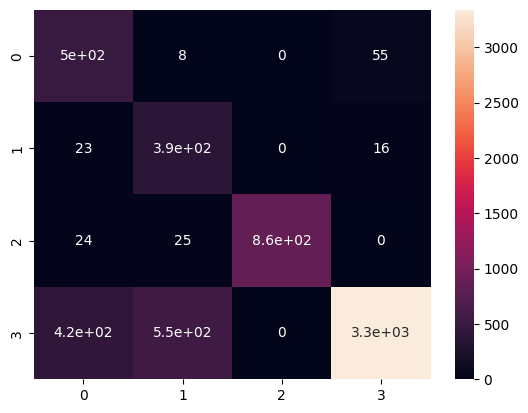

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)